<a href="https://colab.research.google.com/github/kiryu-3/prosa/blob/main/Python/Python_Stats/Stats_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 正規性と等分散性の検定

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install japanize-matplotlib
import japanize_matplotlib
import seaborn as sns
from scipy import stats
from scipy.stats import norm
from scipy.stats import binom
from scipy.stats import t
from scipy.stats import f
from decimal import Decimal, ROUND_HALF_UP, ROUND_HALF_EVEN
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.api import qqplot

## 正規性の検定

検定の多くは「母集団が正規分布に従う」ということを仮定しています。  
この仮定が正しいのかを検定していきます。

ここでは**シャピロ=ウィルク検定**を紹介します。  
そのほかの正規性の検定については[こちら](https://bellcurve.jp/statistics/course/12931.html)に紹介があります。

### 仮説検定のステップ（再掲）
①帰無仮説と対立仮説を立てる  
②帰無仮説のもとで標本観察を行う  
③帰無仮説を棄却できるかどうかを確認する

#### ① 帰無仮説と対立仮説を立てる  

帰無仮説と対立仮説は以下のようになります。（**両側検定**になります）  
母集団が正規分布に従うことを期待しているので、少し帰無仮説の立て方が普段とは異なります。

帰無仮説$H_0$：「母集団が正規分布に従う」  
対立仮説$H_1$：「母集団が正規分布に従わない」

#### ② 帰無仮説のもとで標本観察を行う 

今回は**Q-Qプロット**（Quantile-Quantile Plot）を使います。 

得られたデータが正規分布にどれくらい近いかを視覚的に確認できます。

点が直線に近ければ、観測データは正規分布に近いといういうことができます。  

Pythonで描画するとイメージが湧きやすいと思います。

#### ③ 帰無仮説を棄却できるかどうかを確認する

有意水準を$5$%に設定します。

($p$**値を求めて**) 棄却が必要かどうか決めます。  

### Pythonによる仮説検定

では正規性の検定を行っていきましょう。

ここでは都道府県別の男性と女性の平均睡眠時間の分布について検定します。  
`todohuken_kaidata.csv`をインポートしてください。


In [3]:
df = pd.read_csv("todohuken_kaidata.csv")
df.head(3)

,都道府県,地方,15歳以上の平均睡眠時間（男）,15歳以上の平均睡眠時間（女）,運転免許保有者割合（%）,農業従事者（人口100人あたり）,平均通勤時間（片道）,自動車保有台数（人口100人あたり）,鉄道旅客輸送量(人口一人あたり)
0,北海道,北海道地方,473,465,63.4,1.79,20.2,68.67,65.90
1,青森県,東北地方,486,470,66.4,4.95,20.2,77.65,13.10
2,岩手県,東北地方,477,469,67.6,5.50,20.0,80.55,20.86


In [4]:
male_sleep = df["15歳以上の平均睡眠時間（男）"]
female_sleep = df["15歳以上の平均睡眠時間（女）"] 

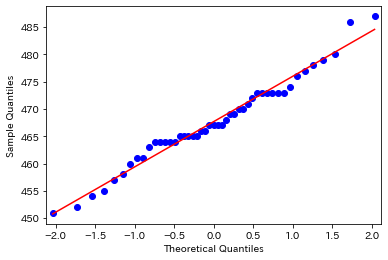

In [5]:
fig = qqplot(male_sleep,line="r")

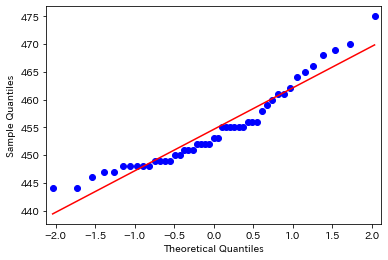

In [6]:
fig = qqplot(female_sleep,line="r")

以下ではシャピロ=ウィルク検定を行っています。

In [7]:
to , pp = tuple(stats.shapiro(male_sleep))

pp = float(Decimal(str(pp*100)).quantize(Decimal('0.001'), rounding=ROUND_HALF_UP))
print(f"p値：{pp}%")

p値：56.967%


* $p$値が$5$%より大きくなった

この一点から、帰無仮説$H_0$を棄却することができません。  
よって、対立仮説$H_1$を採択しません。

In [8]:
print("したがって、男性の睡眠時間の分布は正規分布に従わないとは言えない")

したがって、男性の睡眠時間の分布は正規分布に従わないとは言えない


In [9]:
to , pp = tuple(stats.shapiro(female_sleep))

pp = float(Decimal(str(pp*100)).quantize(Decimal('0.001'),rounding=ROUND_HALF_UP))
print(f"p値：{pp}%")

p値：0.566%


* $p$値が$5$%より小さくなった

この一点から、帰無仮説$H_0$を棄却することができます。  
よって、対立仮説$H_1$を採択します。

In [10]:
print("したがって、女性の睡眠時間の分布は正規分布に従わない")

したがって、女性の睡眠時間の分布は正規分布に従わない


Pythonによるシャピロ=ウィルク検定は、  
**外れ値の影響を強く受ける**ため、注意しましょう。

## 等分散性の検定

等分散性の検定には色々なものがあります。  
今回は2つの母集団の分散の検定に特化した、**F検定**を行っていきます。

2つの標本から得た不偏分散を使って  
母分散が等しいかを検定していきましょう。

ここでは都道府県別の男性と女性の睡眠時間の分散に差があるかを検定します。  
`todohuken_kaidata.csv`をインポートしてください。


### 仮説検定のステップ（再掲）
①帰無仮説と対立仮説を立てる  
②帰無仮説のもとで標本観察を行う  
③帰無仮説を棄却できるかどうかを確認する

#### ① 帰無仮説と対立仮説を立てる  

帰無仮説と対立仮説は以下のようになります。（**両側検定**になります）  

帰無仮説$H_0$：「男性と女性の間で睡眠時間の分散に差がない」  
対立仮説$H_1$：「男性と女性の間で睡眠時間の分散に差がある」

#### ② 帰無仮説のもとで標本観察を行う 

それぞれの母集団の平均を $\mu_1 , \mu_2$ 、標準偏差を $\sigma_1,\sigma_2$、  
標本平均を $\bar{x}_1,\bar{x}_2$、不偏分散を $s^{'2}_1,s^{'2}_2$ とした場合を考えます。

二つの標本の不偏分散の比は、一つの確率変数になります。  
（通常、大きい方を分子に置きます）

$$
F=\frac{{s’_1}^2}{{s’_2}^2}
$$

大きい方の不偏分散を分子に置くので、$F$値は常に$1$以上になります。

この「不偏分散の比」が従う確率分布を$F$**分布**と呼びます。

$F$分布はよくカイ二乗$\chi^2$を使って表されます。

$$
\chi^2=\sum^{n}_{i=1}\frac{(x_i-\bar{x})^2}{\sigma^2}=\frac{(n-1)s’^2}{\sigma^2}
$$

この式を用いて先ほどの$F$を変形します。

$$
F=\frac{\frac{1}{n_1-1}\chi^2_1\sigma^2_1}{\frac{1}{n_2-1}\chi^2_2\sigma^2_2}
$$

今回は帰無仮説が正しいと仮定しているので、$\sigma_1^2=\sigma_2^2$ となります。

$$
F=\frac{\frac{1}{n_1-1}\chi^2_1}{\frac{1}{n_2-1}\chi^2_2}
$$

自由度は $n_1-1$と$n_2-1$ の二つあることに注意して、  
上の式に従って$F$値を導出します。

#### ③ 帰無仮説を棄却できるかどうかを確認する

有意水準を$5$%に設定します。

($p$**値を求めて**) 棄却が必要かどうか決めます。  

### Pythonによる仮説検定

検定を行う前に、$F$分布がどんな感じか確認してみましょう。

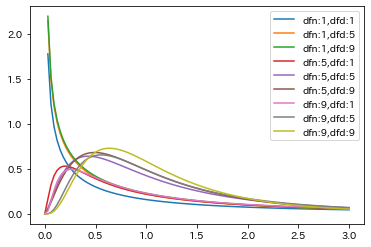

In [11]:
x = np.linspace(0,3,100)

for dfn in range(1,10,4):
  for dfd in range(1,10,4):
    y = f.pdf(x,dfn=dfn,dfd=dfd)
    plt.plot(x,y,label=f"dfn:{dfn},dfd:{dfd}")
plt.legend()

では等分散性の検定を行っていきましょう。

In [12]:
df = pd.read_csv("todohuken_kaidata.csv")
df.head(3)

,都道府県,地方,15歳以上の平均睡眠時間（男）,15歳以上の平均睡眠時間（女）,運転免許保有者割合（%）,農業従事者（人口100人あたり）,平均通勤時間（片道）,自動車保有台数（人口100人あたり）,鉄道旅客輸送量(人口一人あたり)
0,北海道,北海道地方,473,465,63.4,1.79,20.2,68.67,65.90
1,青森県,東北地方,486,470,66.4,4.95,20.2,77.65,13.10
2,岩手県,東北地方,477,469,67.6,5.50,20.0,80.55,20.86


In [13]:
male_sleep = df["15歳以上の平均睡眠時間（男）"]
female_sleep = df["15歳以上の平均睡眠時間（女）"]

n1 = len(male_sleep)
n2 = len(female_sleep)
dfn = n1 -1
dfd = n2 -1
var1 = stats.tvar(male_sleep)
var2 = stats.tvar(female_sleep)
ff = var1/var2
print(ff)

1.1741449639159087


この$F$分布における有意水準$5$%に対応する値は$1.795$です。

In [14]:
fk = stats.f(dfn=dfn , dfd=dfd).ppf(0.975)
fk

1.795323201005244

In [15]:
nyp = float(Decimal(str(stats.f(dfn=dfn , dfd=dfd).sf(fk)*100)).quantize(Decimal('0.001'),
                                                     rounding=ROUND_HALF_UP))
print(f"有意水準：{nyp}%")    # 右側の棄却域の面積
nkp = float(Decimal(str(stats.f(dfn=dfn , dfd=dfd).sf(ff)*100)).quantize(Decimal('0.000001'),
                                                     rounding=ROUND_HALF_UP))
print(f"p値：{nkp}%")

有意水準：2.5%
p値：29.41921%


In [16]:
print("p値が有意水準より大きくなったので、帰無仮説を棄却せず、対立仮説を採択しない")
print("したがって、男性と女性の間で睡眠時間の分散に差がないとはいえない")

p値が有意水準より大きくなったので、帰無仮説を棄却せず、対立仮説を採択しない
したがって、男性と女性の間で睡眠時間の分散に差がないとはいえない


よって男性と女性の平均睡眠時間の差を検定したい場合は  
**ウェルチの$t$検定**を行うべきであると分かります。

### Pythonによる$F$分布の描画

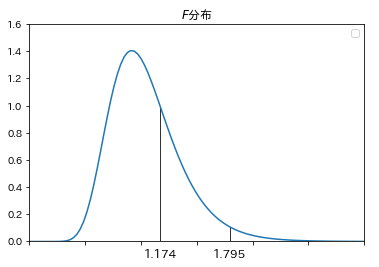

In [17]:
x = np.linspace(0,3,100)
y = stats.f(dfn=dfn , dfd=dfd).pdf(x)
plt.plot(x,y)

"""
****************************************
グラフの書式設定
****************************************
"""
plt.title("$F$分布")   # タイトル
plt.vlines(1.795, 0, stats.f(dfn=dfn , dfd=dfd).pdf(1.795),color="black", lw=0.8)
plt.vlines(ff, 0, stats.f(dfn=dfn , dfd=dfd).pdf(ff),color="black", lw=0.8)
plt.text(ff-0.15, -0.120, '1.174', fontsize = 12) 
plt.text(1.795-0.15, -0.120, '1.795', fontsize = 12)
plt.xticks(color="None") 
plt.xlim(0, 3)  # X軸範囲
plt.ylim(0, 1.6)  # Y軸範囲
plt.legend()  # 凡例
plt.show()

### 演習

[こちら](https://bit.ly/3KfjOxi)の両側検定を行ってみましょう。  

有意水準は$5$%とします。

In [18]:
n1 = 26         # 1組の平均点
n2 = 31         # 2組の平均点
dfn = n1 -1     # 1組の自由度
dfd = n2 -1     # 2組の自由度
var1 = 20       # 1組の不偏分散
var2 = 15       # 2組の不偏分散
ff = var1/var2  # F値
print(ff)

1.3333333333333333


In [19]:
print("H0 : 1組と2組の国語のテストの点数の分散は等しい")
print("H1 : 1組と2組の国語のテストの点数の分散は等しくない")

H0 : 1組と2組の国語のテストの点数の分散は等しい
H1 : 1組と2組の国語のテストの点数の分散は等しくない


この$F$分布における有意水準$5$%に対応する値は$2.124$です。

In [20]:
fk = stats.f(dfn=dfn , dfd=dfd).ppf(0.975)
fk

2.1237175231782417

In [21]:
nyp = float(Decimal(str(stats.f(dfn=dfn , dfd=dfd).sf(fk)*100)).quantize(Decimal('0.001'),
                                                     rounding=ROUND_HALF_UP))
print(f"有意水準：{nyp}%")    # 右側の棄却域の面積
nkp = float(Decimal(str(stats.f(dfn=dfn , dfd=dfd).sf(ff)*100)).quantize(Decimal('0.000001'),
                                                     rounding=ROUND_HALF_UP))
print(f"p値：{nkp}%")

有意水準：2.5%
p値：22.422546%


In [22]:
print("p値が有意水準より大きくなったので、帰無仮説を棄却せず、対立仮説を採択しない")
print("したがって、1組と2組の国語のテストの点数の分散は等しくないとはいえない")

p値が有意水準より大きくなったので、帰無仮説を棄却せず、対立仮説を採択しない
したがって、1組と2組の国語のテストの点数の分散は等しくないとはいえない


## 推定の多重性

近年では、検定の前に検定を行うことは正しくないという指摘があります  
（**推定の多重性**）。

理由としては、連続して検定をすると、エラーが増幅されてしまうためです。



最初から**ウェルチの$t$検定**を行い、等分散性を考えなくてもよいようにしましょう。  

また、標本の数は最低でも$10$は欲しいところです。